In [1]:
import numpy as np #numpy
import pandas as pd
import matplotlib.pyplot as plt  #matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter

import astropy.table  #astropy
from astropy.table import Table, Column, MaskedColumn 
from astropy.visualization import astropy_mpl_style
from scipy.stats import gaussian_kde  #scipy: science python
import seaborn as sns  #seaborn: data visualization
import os.path

from time import time
from sklearn import manifold, datasets

import umap  #UMAP
from sklearn.decomposition import PCA  #PCA
from sklearn.manifold import TSNE  #t-SNE
from itertools import product

# Importem la taula

In [2]:
miglio2021 = Table.read("../data/Miglio2021_X_APOGEE_DR17.fits")
names = [name for name in miglio2021.colnames if len(miglio2021[name].shape) <= 1]
miglio2021.keep_columns(names)
mig = miglio2021.to_pandas()
mig.head()

,APOGEE,KIC,Jmag,Hmag,Ksmag,RAdeg,DEdeg,__Fe_H_,__alpha_M_,Age,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,b'2M19222920+3710285',1569842,9.589,9.074,8.989,290.6217,37.174599,-0.24,0.12,9.8,...,0.012334,0,NaN,NaN,0.005112,2,0.096240,0.151900,0.069591,0
1,b'2M19300513+3717470',1726291,11.206,10.679,10.547,292.5214,37.296398,-0.34,0.19,10.1,...,0.015864,0,NaN,NaN,0.009413,2,-0.318970,-0.263310,0.085400,0
2,b'2M19045380+3741230',2283721,11.266,10.709,10.590,286.2242,37.689701,-0.19,0.11,9.4,...,0.014437,0,NaN,NaN,NaN,259,0.116419,0.172079,0.077468,0
3,b'2M19060736+3740100',2284679,9.923,9.456,9.335,286.5307,37.669399,-0.45,0.21,11.2,...,0.014171,0,NaN,NaN,0.010622,2,-0.313170,-0.257510,0.076819,0
4,b'2M19280882+3736381',2305590,9.829,9.235,9.128,292.0368,37.610600,-0.30,0.24,10.2,...,0.018914,0,NaN,NaN,0.009991,258,0.581840,0.637500,0.082008,0


In [3]:
#Mirem els noms de totes les columnes
print('Number of rows: ' +str(len(mig)))
print('\n Names of the columns:\n')
for column in mig.columns:
    print(column)

Number of rows: 3315

 Names of the columns:

APOGEE
KIC
Jmag
Hmag
Ksmag
RAdeg
DEdeg
__Fe_H_
__alpha_M_
Age
b_Age
b_age_lc
Mass
b_Mass
b_mass_lc
Rad
b_Rad
b_rad_lc
Dist
b_Dist
b_dist_lc
Av
b_Av
b_av_lc
evstate
zmax
e_zmax
Ecc
e_Ecc
Rperi
e_Rperi
Rap
e_Rap
GalR
Galphi
GalZ
vR
vT
vZ
_RA
_DE
APOGEE_ID
TELESCOPE
FIELD
ALT_ID
RA
DEC
GLON
GLAT
J
J_ERR
H
H_ERR
K
K_ERR
AK_TARG
AK_TARG_METHOD
AK_WISE
SFD_EBV
APOGEE_TARGET1
APOGEE_TARGET2
APOGEE2_TARGET1
APOGEE2_TARGET2
APOGEE2_TARGET3
APOGEE2_TARGET4
TARGFLAGS
SURVEY
PROGRAMNAME
NVISITS
SNR
SNREV
STARFLAG
STARFLAGS
ANDFLAG
ANDFLAGS
VHELIO_AVG
VSCATTER
VERR
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CHI2
RV_CCFWHM
RV_AUTOFWHM
RV_FLAG
N_COMPONENTS
MEANFIB
SIGFIB
MIN_H
MAX_H
MIN_JK
MAX_JK
GAIAEDR3_SOURCE_ID
GAIAEDR3_PARALLAX
GAIAEDR3_PARALLAX_ERROR
GAIAEDR3_PMRA
GAIAEDR3_PMRA_ERROR
GAIAEDR3_PMDEC
GAIAEDR3_PMDEC_ERROR
GAIAEDR3_PHOT_G_MEAN_MAG
GAIAEDR3_PHOT_BP_MEAN_MAG
GAIAEDR3_PHOT_RP_MEAN_MAG
GAIAEDR3_DR2_RADIAL_VELOCITY
GAIAEDR3_DR2_RADIAL_VELOCI

# Mirem quines dades tenen FLAGS

In [4]:
for columns in mig:
    if columns.endswith("_FLAG"):
        print(columns)
        print(mig[str(columns)].value_counts())
        print()

RV_FLAG
0     3314
32       1
Name: RV_FLAG, dtype: int64

C_FE_FLAG
0      3314
256       1
Name: C_FE_FLAG, dtype: int64

CI_FE_FLAG
0      3312
256       3
Name: CI_FE_FLAG, dtype: int64

N_FE_FLAG
0      3272
256      37
288       6
Name: N_FE_FLAG, dtype: int64

O_FE_FLAG
0    3315
Name: O_FE_FLAG, dtype: int64

NA_FE_FLAG
0      3311
256       3
1         1
Name: NA_FE_FLAG, dtype: int64

MG_FE_FLAG
0    3315
Name: MG_FE_FLAG, dtype: int64

AL_FE_FLAG
0    3315
Name: AL_FE_FLAG, dtype: int64

SI_FE_FLAG
0    3315
Name: SI_FE_FLAG, dtype: int64

P_FE_FLAG
2      3270
258      30
0         8
3         4
259       3
Name: P_FE_FLAG, dtype: int64

S_FE_FLAG
0      3314
256       1
Name: S_FE_FLAG, dtype: int64

K_FE_FLAG
0      3313
1         1
256       1
Name: K_FE_FLAG, dtype: int64

CA_FE_FLAG
0    3315
Name: CA_FE_FLAG, dtype: int64

TI_FE_FLAG
0    3315
Name: TI_FE_FLAG, dtype: int64

TIII_FE_FLAG
0      3307
257       4
256       3
1         1
Name: TIII_FE_FLAG, dtype: int64


# Data selection criteria

In [5]:
mig = mig[mig['TEFF'] < 6200]
#mig = mig[(mig['LOGG'] < 4)&(mig['LOGG'] > 3.5)]
#mig = mig[mig['TEFF_ERR'] < 150]

# Teff-logg diagram

Text(0.5, 1.0, 'LOGG(TEFF)')

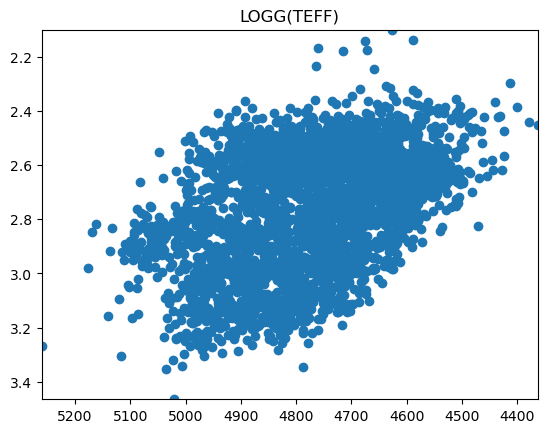

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = mig['TEFF']
y = mig['LOGG']
plt.scatter(x,y)
plt.xlim(max(x), min(x))
plt.ylim(max(y), min(y))
plt.title('LOGG(TEFF)')

Aquest output no te sentint, no me esta filtrant correctament les dades

Mirem la relacio entre [Fe/H] i the isocronic age

Text(0.5, 1.0, '[Fe/H](isocronic age)')

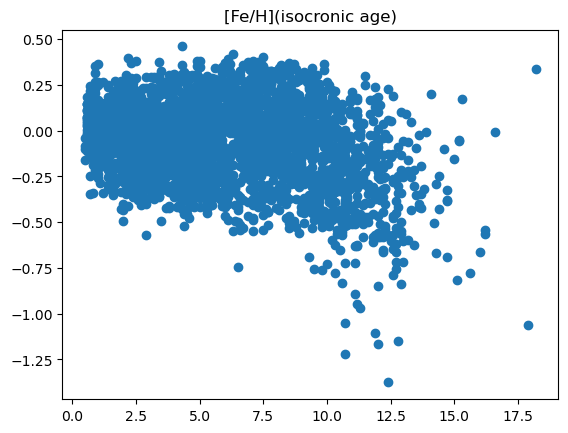

In [7]:
x = mig['Age']
y = mig['FE_H']
plt.scatter(x,y)
plt.title('[Fe/H](isocronic age)')

Sembla mes coherent

# Creacio del dataset

Primer nomes agafarem les columnes que estem interessats a utilitzar per a entrenar el model

Primer agafarem les metalicitats sense tenir en compte els flags

In [8]:
filtered_df = mig[['Age', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE',
                  'TI_FE', 'V_FE', 'CR_FE', 'MN_FE', 'FE_H', 'CO_FE', 'NI_FE', 'CE_FE' ]].copy()
filtered_df = filtered_df.dropna()
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

In [9]:
filtered_df.head()

,Age,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,S_FE,K_FE,CA_FE,TI_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CE_FE
0,9.8,0.071996,0.076009,0.073346,0.196913,-0.129988,0.223263,0.188314,0.134081,0.158702,0.235769,0.094765,0.179623,-0.042288,0.026374,-0.101498,-0.29065,0.09864,0.107133,0.096240
1,10.1,0.070293,0.194000,0.115990,0.314393,-0.352128,0.348673,0.259540,0.198561,0.275392,0.302629,0.190765,0.151823,0.250612,-0.085416,-0.122728,-0.38827,0.13715,0.110182,-0.318970
2,9.4,0.065446,0.029532,0.086760,0.180403,0.009112,0.186943,0.195936,0.124651,0.161352,0.368155,0.109715,0.109363,-0.187218,-0.007106,-0.096728,-0.24318,0.11898,0.042022,0.116419
3,11.2,0.102185,0.198900,0.009152,0.328173,0.068522,0.361593,0.247761,0.191911,0.267322,0.361549,0.191585,0.183673,-0.175608,-0.055566,-0.144048,-0.49474,0.08713,0.081733,-0.313170
4,10.2,0.166720,0.234920,0.034750,0.282853,0.043942,0.394983,0.272437,0.166551,0.222602,0.411468,0.190875,0.281993,-0.025298,0.037334,-0.137478,-0.40002,0.19849,0.095583,0.581840


# XGBOOST

In [10]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Split dataframe into input and output columns
y = filtered_df['Age']
X = filtered_df.drop(columns = 'Age')

# Splitting into train and test
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
  
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)

# Save the model
xgb_r.save("./models/default_xgb_miglio2021.xgb")
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

for ii in np.arange(10):
    # Run XGBoost with slightly perturbed input data
    xgb_ii = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
    

[17:58:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013913324/work/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1.523072


# PLOT

r value 0.8846226702094635
std_err 0.013009157413163119


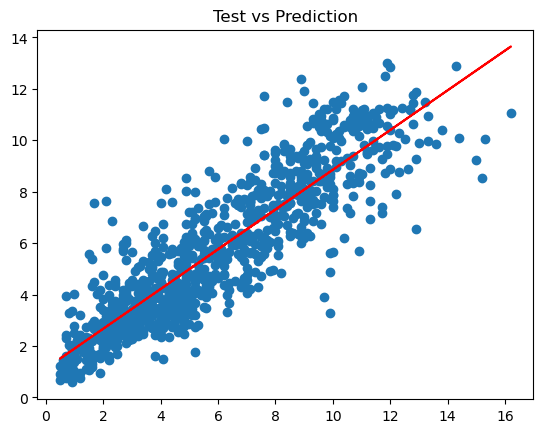

In [11]:
xp = test_y
yp = pred
from scipy.stats import linregress
slope, intercept, r, p, se = linregress(xp, yp)
plt.scatter(xp,yp)
yp_lin = slope*xp + intercept
plt.plot(xp, yp_lin, color = 'red')
plt.title('Test vs Prediction')
print('r value', r)
print('std_err',se)

# SHAP

In [15]:
test_X

array([[-0.02429099, -0.038846  ,  0.121086  , ..., -0.10231   ,
         0.0414625 , -0.047249  ],
       [ 0.07183802, -0.08360299,  0.31618002, ...,  0.06775001,
         0.08123252, -0.23190999],
       [-0.067601  , -0.092457  ,  0.27223498, ...,  0.00636068,
         0.0252115 , -0.11474   ],
       ...,
       [ 0.04174201,  0.012803  ,  0.15276001, ...,  0.1859193 ,
         0.0525225 ,  0.01042099],
       [-0.068477  , -0.10828999,  0.28756   , ..., -0.25287   ,
         0.04909249, -0.10065001],
       [-0.08215199, -0.165828  ,  0.276562  , ..., -0.100913  ,
         0.0444465 ,  0.0318    ]], dtype=float32)

In [17]:
import shap
#test_X = test_X.values
# Fits the explainer
explainer = shap.Explainer(xgb_r)
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [18]:
shap_values

.values =
array([[ 1.0647260e+00,  9.2267022e-02,  1.9873869e+00, ...,
        -4.8256662e-02, -4.3638289e-02,  1.9270591e-02],
       [ 1.4852408e+00,  2.7961755e-02, -1.3409355e+00, ...,
        -3.2900851e-03, -1.9819560e-03,  7.3607765e-02],
       [-9.7005457e-01,  4.3803114e-03, -2.0466663e-01, ...,
         9.1123004e-03,  8.9836143e-02,  5.8550444e-03],
       ...,
       [ 1.6454422e+00, -4.7808949e-02,  9.5834517e-01, ...,
         6.8438612e-04, -5.8573060e-02, -3.9735027e-02],
       [-5.8703876e-01,  1.5620702e-02, -4.0329859e-01, ...,
        -1.6593932e-01,  4.3701626e-02,  8.7349065e-02],
       [-1.3285588e+00,  7.0263959e-02, -2.8453270e-01, ...,
        -2.6784474e-01,  2.4330257e-02, -1.8748656e-02]], dtype=float32)

.base_values =
array([5.5282426, 5.5282426, 5.5282426, 5.5282426, 5.5282426, 5.5282426,
       5.5282426, 5.5282426, 5.5282426, 5.5282426, 5.5282426, 5.5282426,
       5.5282426, 5.5282426, 5.5282426, 5.5282426, 5.5282426, 5.5282426,
       5.5282426, 5

In [ ]:
modified_abunds = abund + np.random.normal(0, error_abund)